## 모델 학습 완료된 상태

### 1. TEST 진행 시
**해당 4 개의 셀만 클릭하여 돌리기**
- `!pip install openai`
- 라이브러리 설치
- `client = ....`
- 파인튜닝된 모델로 학습하기 셀

: 숨겨진 셀은 열지 않아도 됩니당


In [1]:
!pip install openai

In [2]:
from openai import OpenAI
import json

In [3]:
client = OpenAI(api_key = "Add your API key")

####Fine Tuning

In [ ]:
# 학습용 데이터 전송
train_res = client.files.create(
    file=open("train_data.jsonl","rb"),
    purpose='fine-tune'
)
print("File ID:", train_res.id)

In [ ]:
# validation 데이터 전송
val_res = client.files.create(
    file=open("valid_data.jsonl","rb"),
    purpose='fine-tune'
)
# 업로드된 파일의 ID 확인
print("File ID:", val_res.id)

In [ ]:
# 파일 등록하여 받은 파일 ID로 파인튜닝 job을 생성
fine_tune_response = client.fine_tuning.jobs.create(
    training_file=train_res.id,
    validation_file = val_res.id,
    hyperparameters={
      "n_epochs":  "3"
  },
    model="gpt-4o-mini-2024-07-18"
)

In [ ]:
# 특정 작업 상태 확인
fine_tune_id = fine_tune_response.id
status = client.fine_tuning.jobs.retrieve(fine_tune_id)
print(status.status)

succeeded


In [ ]:
print(status)

#### TEST

In [ ]:
# 파인튜닝된 모델로 질문하기
completion  = client.chat.completions.create(
    model="Add your fine tuned model ID",
    messages=[
        {"role":"system", "content":"Analyze restaurant review keywords and classify them into appropriate categories among the five categories (맛, 서비스, 위생, 가성비, 분위기) based on their meanings and characteristics. For each category, generate a natural Korean sentence that summarizes the key points while maintaining the original sentiment and including specific details from the keywords"},
        {"role":"user", "content":"Keywords: ['쫀득쫀득', '생크림빵', '포장제품 다양', '하나같이 맛있어요', '고로케', '빵', '빵도 싸면서 골고루 맛있어서', '슈크림 빵', '하얀크림빵', '빵 맛있다', '카드결제하기 미안할정도로 싸요', '생크림스틱 맛', '팥빙수', '멜론빵', '사장님이 알바생에게 점심 사주다', '다양한 종류의 빵', '마싯슴', '종류', '개인 빵집', '빵 맛도 좋네요', '재방문', '빵 종류', '빵집', '동네사람들', '음료도 팔고 있어서 좋음', '찹쌀꽈배기', '옛날 맛', '생크림스틱 부드럽고 포근하고 달달', '꿀꽈배기 빵 버전', '크림도넛', '방문 의사', '제가 좋아하는 곳이예요', '가격', '먹을만합니다', '다른 빵', '동네맛집', '메리 크리스마스', '컵 카스테라', '크림듬뿍들어간빵', '식빵', '가성비', '찹쌀 도너츠', '추억의 빵', '메론빵', '카스테라빵', '맛도좋고', '방문하는 빈도', '크림 도넛', '굿 여기빵 맛있구요', '맛 좋음', '가성비 좋은 빵집', '메론빵 맛', '에그타르트 생도넛 공갈빵 옛날 샐러드빵 당근빵', '크기', '바게트', '사장님 엄청 친절하시고', '가격대도 저렴허고', '투박하면서도 푸짐한', '가격도 너무 좋고', '패스츄리', '고구마 케이크', '맛있게 먹을게요', '쫄깃쫄깃', '친절한 사장님', '제가 좋아하는 곳', '맛도 있다', '양', '할미입맛 저격하는 빵', '빵도 사가', '기력회복', '재료도 안 아껴요', '이집의 인기매뉴 찹쌀생크림스틱', '크림빵', '3천원', '도너츠 나쁘지 않은', '빵피', '프랜차이즈 빵집에서 보기 드문', '시간이 남아', '맛이나 퀄리티', '빵 1200원', '살살 녹아요', '맛좋음', '맛있음', '자주 들리고 싶다', '케이크 맛있다', '가격 대비', '사라다빵', '아이들이 잘 먹었어요', '친절한 사장님과 사모님', '빵 맛', '빵이 여전히 맛있어요', '잡곡식빵도 고소하고', '부드럽다', '사라다 맛있어요', '맛있어요', '밤식빵', '맛나요', '너무 맛있었어요', '양도 많구', '손님이 북적', '잘한다', '재료 품질', '시원하게 한잔', '진짜 맛있어요', '맛있는집', '평소 맛있다', '저렴하다', '가격도 착하고', '한여름', '맛집', '호밀빵', '잡곡식빵', '추억을 자극하는', '가격 저렴', '샌드위치', '위치', '슈크림', '친절한 서비스', '맛', '빵 종류 다양하다', '강추', '단골집 등록', '언제든지 빵을 살 수 있다', '다른 빵들 맛있음', '재방문 기대', '소보르 좋아해', '싸고 맛있다', '가격이 저렴한', '가격 착해요', '크림도넛 만족도 높고 맛있었어요', '빵도 큰데 소화가 잘됨', '릴스 그 빵 생크림스틱', '생크림 듬뿍', '맛있었어요', '깨찰빵', '사장님친절', '한정수량', '빵 종류 다양', '친절', '맛있다', '부드러운 맛', '크로와상', '기대됩니다', '맛있게 잘 먹어왔는데', '친절하시고', '메론크림빵', '사장님 친절', '앙버터', '사장님', '흔치 않은', '빵 종류도 많고', '안에서 먹고', '다른 빵도 먹어보고 싶어요', '화이트롤 맛있음', '좋아하는 빵', '슈크림빵', '품질', '생크림 빵', '가격 저렴하다', '맘모스빵', '맛있는 빵', '직원 친절', '사라다빵 맛있다', '생크림스틱', '서비스', '재료를 아끼지 않음', '소금빵 바닥', '오란다빵 견과류', '생크림 스틱', '크림치즈 브레드 촉촉쫄깃 버터리', '빵종류가 많고', '미니샌드위치빵은 야채가 엄청싱싱하고', '예약', '생크림스틱빵 유명하다', '친절하세요', '직접 다 만들고']"}
    ]
)
print(completion.choices[0].message.content)

## 성능 평가 - BLEU & ROUGE

#### 1. 카테고리 정확도

- 모델이 제시한 카테고리가 실제 카테고리와 얼마나 일치하는지 평가
- 카테고리 집합의 교집합 / 실제 카테고리 수


#### 2. ROUGE 스코어

- representative_sentence의 품질을 평가
- ROUGE-1, ROUGE-2, ROUGE-L 점수를 계산
- 각 카테고리별로 매칭되는 문장끼리 비교


#### 3. BLEU 스코어

- representative_sentence의 품질을 추가로 평가
- 각 카테고리별 매칭되는 문장끼리 비교


#### 4. 응답 시간

- 각 요청에 대한 모델의 응답 시간 측정
- 평균, 표준편차, 최소, 최대값 제공


#### 5. 에러율

- JSON 파싱 실패 등 오류 발생 비율





### 1. 단일 테스트 성능평가

In [ ]:
# 데이터 확인
with open(VALID_DATA_PATH, 'r', encoding='utf-8') as f:
    first_line = f.readline()
print("\nFirst line sample:", first_line[:200])


First line sample: {"messages": [{"role": "system", "content": "Analyze restaurant review keywords and classify them into appropriate categories among the five categories (맛, 서비스, 위생, 가성비, 분위기) based on their meanings a


In [ ]:
def evaluate_single_case(client, model_id, test_case):
    start_time = time.time()
    try:
        # 모델 호출
        completion = client.chat.completions.create(
            model=model_id,
            messages=[
                {"role": "system", "content": test_case['messages'][0]['content']},
                {"role": "user", "content": test_case['messages'][1]['content']}
            ]
        )
        response_time = time.time() - start_time

        # 실제값과 예측값 파싱
        true_response = json.loads(test_case['messages'][2]['content'])
        pred_response = json.loads(completion.choices[0].message.content)

        return {
            'response_time': response_time,
            'true_response': true_response,
            'pred_response': pred_response
        }

    except Exception as e:
        print(f"Error in single case evaluation: {str(e)}")
        raise

In [ ]:
def calculate_category_accuracy(true_response, pred_response):
    try:
        true_categories = set([item['category'] for item in true_response])
        pred_categories = set([item['category'] for item in pred_response])
        return len(true_categories.intersection(pred_categories)) / len(true_categories)
    except Exception as e:
        print(f"Category accuracy calculation error: {str(e)}")
        return 0

In [ ]:
def calculate_rouge_scores(true_response, pred_response, scorer):
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
    for true_item in true_response:
        true_category = true_item['category']
        true_sent = true_item.get('representative_sentence', '')

        for pred_item in pred_response:
            if pred_item['category'] == true_category:
                pred_sent = pred_item.get('representative_sentence', '')

                if true_sent and pred_sent:
                    true_processed = ' '.join(list(true_sent))
                    pred_processed = ' '.join(list(pred_sent))
                    scores = scorer.score(true_processed, pred_processed)
                    for key in rouge_scores:
                        rouge_scores[key].append(scores[key].fmeasure)
                break

    for key in rouge_scores:
        scores = rouge_scores[key]
        rouge_scores[key] = mean(scores) if scores else 0
    return rouge_scores

In [ ]:
def calculate_bleu_score(true_response, pred_response):
    smoother = SmoothingFunction().method1
    bleu_scores = []
    for true_item in true_response:
        true_category = true_item['category']
        true_sent = true_item.get('representative_sentence', '')

        for pred_item in pred_response:
            if pred_item['category'] == true_category:
                pred_sent = pred_item.get('representative_sentence', '')
                if true_sent and pred_sent:
                    reference = [list(true_sent)]
                    candidate = list(pred_sent)
                    score = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0), smoothing_function=smoother)
                    bleu_scores.append(score)
                break

    return mean(bleu_scores) if bleu_scores else 0


In [ ]:
def load_valid_data(valid_data_path, num_samples=None):
    with open(valid_data_path, 'r', encoding='utf-8') as f:
        valid_data = [json.loads(line) for line in f]
    if num_samples:
        valid_data = valid_data[:num_samples]
    return valid_data

In [ ]:
valid_data = load_valid_data(VALID_DATA_PATH, num_samples=10)
print(f"Loaded {len(valid_data)} samples")

Loaded 10 samples


In [ ]:
model_id = "Add your fine tuned model ID"
test_case = valid_data[0]

result = evaluate_single_case(client, model_id, test_case)
print(result)

{'response_time': 7.3824732303619385, 'true_response': [{'category': '맛', 'group_keywords': '음식은 금방 식어버려, 화이트 라구 파스타, 맛있는지 모르겠고, 매쉬포테이토, 피클을 안주네요, 새우메뉴, 에그베네딕트, 베네딕트 느끼함, 뇨끼 자체는 제 스타일이 아니고 떡같은 스타일, 포크 라이스와 칠리 어쩌구, 향신료, 평범, 무화과 품절, 오버쿡 콜드파스타, 뇨끼 맛, 생각보다 느끼하다, 베이컨, 베네딕트 약간 맵다, 무화과 들어간 시즌메뉴, 수란, 베네딕트류 질려요, 뇨끼 쏘쏘하다, 맛이 너무 없다, 파스타 면 맛, 맛, 맛없다, 플랫화이트 맛, 스프는 정말 별로, 치킨칙피스보울 간이 부족하다, 음식이 짰다, 에그베네딕트 먹기 힘들다, 맛은, 오픈샌드위치, 가격대비 맛, 무슨 맛인지 잘 모르겠다, 뇨끼, 베네딕트 빵 너무 차갑다, 베네딕트, 지금의 맛, 짠맛, 라자냐 마니 마른 느낌, 맛이 너무 없다, 파스타 면 맛, 음식 맛, 콰트로치즈뇨끼 치즈향만 나는 느낌, 음식 느끼함', 'representative_sentence': '음식은 금방 식어버리고, 맛이 느끼하거나 부족하며, 특히 베네딕트와 뇨끼는 입맛에 맞지 않는다.'}, {'category': '위생', 'group_keywords': '푸세식 화장실, 화장실, 청소 필요, 작은 털파리 날파리, 청소, 식기류 상태, 화장실 가는 과정', 'representative_sentence': '청결 상태가 좋지 않으며 특히 화장실이 불편하고 청소가 필요하다.'}, {'category': '서비스', 'group_keywords': '직원의 응대, 피클을 안주네요, 웨이팅 싫어, 서비스 태도, 주방의 대응, 재방문 의사, 대기할 필요 없음, 전화번호 조회, 첫 방문 쿠폰', 'representative_sentence': '직원들의 응대가 미흡하고 대기 시간이 길어 서비스에 대한 만족도가 낮다.'}, {'category': '분위기', '

In [ ]:
true_response = result['true_response']
pred_response = result['pred_response']

category_accuracy = calculate_category_accuracy(true_response, pred_response)
print(f"Category Accuracy: {category_accuracy}")

Category Accuracy: 1.0


In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = calculate_rouge_scores(true_response, pred_response, scorer)
print(f"ROUGE Scores: {rouge_scores}")

ROUGE Scores: {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0}


In [ ]:
bleu_score = calculate_bleu_score(true_response, pred_response)
print(f"BLEU Score: {bleu_score}")


BLEU Score: 0.4034397302636867


In [ ]:
metrics = {
    'response_time': result['response_time'],
    'category_accuracy': category_accuracy,
    'rouge_scores': rouge_scores,
    'bleu_score': bleu_score
}

print(f"Metrics for the test case:\n{metrics}")


Metrics for the test case:
{'response_time': 7.3824732303619385, 'category_accuracy': 1.0, 'rouge_scores': {'rouge1': 0.0, 'rouge2': 0.0, 'rougeL': 0}, 'bleu_score': 0.4034397302636867}


In [ ]:
print("True Response:", true_response)
print("Predicted Response:", pred_response)

for true_item in true_response:
    true_category = true_item['category']
    true_sent = true_item.get('representative_sentence', '')

    for pred_item in pred_response:
        if pred_item['category'] == true_category:
            pred_sent = pred_item.get('representative_sentence', '')
            print(f"True Sentence ({true_category}): {true_sent}")
            print(f"Predicted Sentence ({true_category}): {pred_sent}")


True Response: [{'category': '맛', 'group_keywords': '음식은 금방 식어버려, 화이트 라구 파스타, 맛있는지 모르겠고, 매쉬포테이토, 피클을 안주네요, 새우메뉴, 에그베네딕트, 베네딕트 느끼함, 뇨끼 자체는 제 스타일이 아니고 떡같은 스타일, 포크 라이스와 칠리 어쩌구, 향신료, 평범, 무화과 품절, 오버쿡 콜드파스타, 뇨끼 맛, 생각보다 느끼하다, 베이컨, 베네딕트 약간 맵다, 무화과 들어간 시즌메뉴, 수란, 베네딕트류 질려요, 뇨끼 쏘쏘하다, 맛이 너무 없다, 파스타 면 맛, 맛, 맛없다, 플랫화이트 맛, 스프는 정말 별로, 치킨칙피스보울 간이 부족하다, 음식이 짰다, 에그베네딕트 먹기 힘들다, 맛은, 오픈샌드위치, 가격대비 맛, 무슨 맛인지 잘 모르겠다, 뇨끼, 베네딕트 빵 너무 차갑다, 베네딕트, 지금의 맛, 짠맛, 라자냐 마니 마른 느낌, 맛이 너무 없다, 파스타 면 맛, 음식 맛, 콰트로치즈뇨끼 치즈향만 나는 느낌, 음식 느끼함', 'representative_sentence': '음식은 금방 식어버리고, 맛이 느끼하거나 부족하며, 특히 베네딕트와 뇨끼는 입맛에 맞지 않는다.'}, {'category': '위생', 'group_keywords': '푸세식 화장실, 화장실, 청소 필요, 작은 털파리 날파리, 청소, 식기류 상태, 화장실 가는 과정', 'representative_sentence': '청결 상태가 좋지 않으며 특히 화장실이 불편하고 청소가 필요하다.'}, {'category': '서비스', 'group_keywords': '직원의 응대, 피클을 안주네요, 웨이팅 싫어, 서비스 태도, 주방의 대응, 재방문 의사, 대기할 필요 없음, 전화번호 조회, 첫 방문 쿠폰', 'representative_sentence': '직원들의 응대가 미흡하고 대기 시간이 길어 서비스에 대한 만족도가 낮다.'}, {'category': '분위기', 'group_keywords': '붐비는 상황, 분위기, 자리가 협소한 점

In [ ]:
print("Raw Predicted Response:", completion.choices[0].message.content)

Raw Predicted Response: [{"category": "맛", "group_keywords": "쫀득쫀득, 고로케, 슈크림 빵, 하얀크림빵, 빵 맛있다, 생크림스틱 맛, 팥빙수, 멜론빵, 다양한 종류의 빵, 빵 맛도 좋네요, 찹쌀꽈배기, 옛날 맛, 생크림스틱 부드럽고 포근하고 달달, 꿀꽈배기 빵 버전, 크림도넛, 에그타르트 생도넛 공갈빵 옛날 샐러드빵 당근빵, 메론빵 맛, 사라다 맛있어요, 빵 맛, 빵이 여전히 맛있어요, 맛요, 너무 맛있었어요, 케이크 맛있다, 잡곡식빵도 고소하고, 부드럽다, 밤식빵, 맛있는집, 평소 맛있다, 맛 좋음, 맛 좋음, 메론빵 맛, 사라다 맛있어요, 빵 맛, 캐모마일 맛, 가격 대비, 빵 맛있음, 빵 맛있어요, 크림도넛 맛있었어요, 크림도넛 만족도 높고 맛있었어요, 깨찰빵, 앙버터, 메론크림빵, 맘모스빵, 소금빵 바닥, 오란다빵 견과류, 크림치즈 브레드 촉촉쫄깃 버터리, 빵종류가 많고, 미니샌드위치빵은 야채가 엄청싱싱하고, 생크림스틱, 생크림 스틱, 크림도넛, 생크림스틱 맛, 슈크림빵, 생크림빵, 단호박 식빵, 도너츠 나쁘지 않은, 빵 생크림스틱, 지점 빵 맛있고, 부드럽고 달달한", "representative_sentence": "이곳의 다양한 종류의 빵은 부드럽고 맛있으며 특히 생크림스틱과 슈크림빵이 인기입니다."}, {"category": "위생", "group_keywords": "", "representative_sentence": ""}, {"category": "서비스", "group_keywords": "사장님이 알바생에게 점심 사주다, 친절한 사장님과 사모님, 친절한 서비스, 친절한 사장님과 사모님, 사장님친절, 친절, 직원 친절, 서비스, 친절하세요, 친절하시고", "representative_sentence": "사장님과 직원들이 매우 친절하여 방문할 때마다 따뜻한 서비스를 받습니다."}, {"category": "분위기", "group_keywords": "", "representative_se

단일 케이스 테스트

In [ ]:
# 먼저 하나의 케이스로 테스트
with open(VALID_DATA_PATH, 'r', encoding='utf-8') as f:
    test_case = json.loads(f.readline())
result = evaluator._evaluate_single_case(test_case)
print("Single case test successful!")
print("\nResponse time:", result['response_time'])
print("BLEU score:", result['bleu_score'])
print("Category accuracy:", result['category_accuracy'])
print("\nROUGE scores:", json.dumps(result['rouge_scores'], indent=2))

Single case test successful!

Response time: 6.950690984725952
BLEU score: 0.5177064129249678
Category accuracy: 1.0

ROUGE scores: {
  "rouge1": 0.0,
  "rouge2": 0.0,
  "rougeL": 0
}


#### 시각화

#### 최종 평가 결과

In [ ]:
def print_evaluation_report(results: Dict):
    """평가 결과를 보기 좋게 출력하는 함수"""
    print("\n=== 모델 평가 리포트 ===")

    # 기본 메트릭
    print("\n[기본 메트릭]")
    print(f"카테고리 정확도: {results['metrics']['category_accuracy']:.2%}")
    print(f"에러율: {results['metrics']['error_rate']:.2%}")

    # 응답 시간
    print("\n[응답 시간 (초)]")
    print(f"평균: {results['metrics']['response_time']['mean']:.3f}")
    print(f"표준편차: {results['metrics']['response_time']['std']:.3f}")
    print(f"최소: {results['metrics']['response_time']['min']:.3f}")
    print(f"최대: {results['metrics']['response_time']['max']:.3f}")

    # ROUGE 스코어
    print("\n[ROUGE 스코어]")
    for key, value in results['metrics']['rouge_scores'].items():
        print(f"{key}: {value:.3f}")

    # BLEU 스코어
    print(f"\n[BLEU 스코어]: {results['metrics']['bleu_score']:.3f}")

    # 에러 샘플
    if results['errors']:
        print("\n[에러 샘플] (최대 3개)")
        for error in results['errors'][:3]:
            print(f"\nInput: {error['input'][:100]}...")
            print(f"Error: {error['error']}")

In [ ]:
results = evaluator.evaluate_model(
    valid_data_path=VALID_DATA_PATH,
    num_samples=None  # None으로 설정하면 전체 데이터 사용
)

Total validation data: 29


Evaluating: 100%|██████████| 29/29 [03:56<00:00,  8.16s/it]


In [ ]:
# 결과 출력
print_evaluation_report(results)


=== 모델 평가 리포트 ===

[기본 메트릭]
카테고리 정확도: 60.00%
에러율: 93.10%

[응답 시간 (초)]
평균: 3.339
표준편차: 1.742
최소: 1.597
최대: 5.081

[ROUGE 스코어]
rouge1: 0.000
rouge2: 0.000
rougeL: 0.000

[BLEU 스코어]: 0.000

[에러 샘플] (최대 3개)

Input: Keywords: ['붐비는 상황', '푸세식 화장실', '직원의 응대', '음식은 금방 식어버려', '화이트 라구 파스타', '분위기', '화장실', '매쉬포테이토', '맛있는지...
Error: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Input: Keywords: ['스콘', '대화하기 좋은 분위

In [ ]:
# 결과 저장 및 시각화
evaluator.plot_metrics(results)
evaluator.save_results(results)

# 성능평가 - METEOR & BERTScore

In [4]:
!pip install evaluate transformers nltk bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
# 구글 드라이브 마운트 (필요한 경우)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import json
import time
from nltk.translate.meteor_score import single_meteor_score
import pandas as pd
import numpy as np
from statistics import mean

In [40]:
# NLTK 데이터 다운로드 (METEOR 스코어 계산에 필요)
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
# 1. Load validation data
def load_validation_data(valid_data_path, num_samples=None):
    with open(valid_data_path, 'r', encoding='utf-8') as f:
        data = [json.loads(line) for line in f]
    if num_samples:
        data = data[:num_samples]
    return data

In [10]:
# 경로 설정
SAVE_PATH = '/content/drive/MyDrive/Colab Notebooks/FineTuning_LED'
VALID_DATA_PATH = f'{SAVE_PATH}/valid_data.jsonl'

# 데이터 로드
valid_data = load_validation_data(VALID_DATA_PATH, num_samples=None)  # 샘플 데이터 29개 로드
print(f"Loaded {len(valid_data)} samples.")

Loaded 29 samples.


In [22]:
model_id = "Add your fine tuned model ID"

#### 하나의 CASE에 대한 성능평가

In [19]:
# 2. 1개의 TEST case에 대해 성능평가
def evaluate_single_case(client, model_id, test_case):
    start_time = time.time()
    try:
        # Model prediction
        completion = client.chat.completions.create(
            model=model_id,
            messages=[
                {"role": "system", "content": test_case['messages'][0]['content']},
                {"role": "user", "content": test_case['messages'][1]['content']}
            ]
        )
        response_time = time.time() - start_time

        # Parse responses
        true_response = json.loads(test_case['messages'][2]['content'])
        pred_response = json.loads(completion.choices[0].message.content)

        return {
            'response_time': response_time,
            'true_response': true_response,
            'pred_response': pred_response
        }
    except Exception as e:
        print(f"Error in single case evaluation: {e}")
        return None

In [24]:
# 첫 번째 테스트 케이스 실행
test_case = valid_data[0]
result = evaluate_single_case(client, model_id, test_case)

if result:
    print(f"Response Time: {result['response_time']}")
    print(f"True Response: {result['true_response']}")
    print(f"Predicted Response: {result['pred_response']}")
else:
    print("Evaluation failed for this test case.")

Response Time: 5.419600486755371
True Response: [{'category': '맛', 'group_keywords': '음식은 금방 식어버려, 화이트 라구 파스타, 맛있는지 모르겠고, 매쉬포테이토, 피클을 안주네요, 새우메뉴, 에그베네딕트, 베네딕트 느끼함, 뇨끼 자체는 제 스타일이 아니고 떡같은 스타일, 포크 라이스와 칠리 어쩌구, 향신료, 평범, 무화과 품절, 오버쿡 콜드파스타, 뇨끼 맛, 생각보다 느끼하다, 베이컨, 베네딕트 약간 맵다, 무화과 들어간 시즌메뉴, 수란, 베네딕트류 질려요, 뇨끼 쏘쏘하다, 맛이 너무 없다, 파스타 면 맛, 맛, 맛없다, 플랫화이트 맛, 스프는 정말 별로, 치킨칙피스보울 간이 부족하다, 음식이 짰다, 에그베네딕트 먹기 힘들다, 맛은, 오픈샌드위치, 가격대비 맛, 무슨 맛인지 잘 모르겠다, 뇨끼, 베네딕트 빵 너무 차갑다, 베네딕트, 지금의 맛, 짠맛, 라자냐 마니 마른 느낌, 맛이 너무 없다, 파스타 면 맛, 음식 맛, 콰트로치즈뇨끼 치즈향만 나는 느낌, 음식 느끼함', 'representative_sentence': '음식은 금방 식어버리고, 맛이 느끼하거나 부족하며, 특히 베네딕트와 뇨끼는 입맛에 맞지 않는다.'}, {'category': '위생', 'group_keywords': '푸세식 화장실, 화장실, 청소 필요, 작은 털파리 날파리, 청소, 식기류 상태, 화장실 가는 과정', 'representative_sentence': '청결 상태가 좋지 않으며 특히 화장실이 불편하고 청소가 필요하다.'}, {'category': '서비스', 'group_keywords': '직원의 응대, 피클을 안주네요, 웨이팅 싫어, 서비스 태도, 주방의 대응, 재방문 의사, 대기할 필요 없음, 전화번호 조회, 첫 방문 쿠폰', 'representative_sentence': '직원들의 응대가 미흡하고 대기 시간이 길어 서비스에 대한 만족도가 낮다.'}, {'category': '분위기', 'group_k

In [ ]:
if result:
    # METEOR 점수
    meteor_score = calculate_meteor_score(result['true_response'], result['pred_response'])
    print(f"METEOR Score: {meteor_score}")

    # BERTScore
    bertscore = calculate_bertscore(result['true_response'], result['pred_response'], lang='ko')
    print(f"BERTScore - Precision: {bertscore['precision']}, Recall: {bertscore['recall']}, F1: {bertscore['f1']}")


### METEOR & BERTScore 스코어 계산 함수

In [41]:
# 3. METEOR Score 계산 함수
from nltk.tokenize import word_tokenize

def calculate_meteor_score(true_response, pred_response):
    meteor_scores = []
    for true_item in true_response:
        true_category = true_item['category']
        true_sent = true_item.get('representative_sentence', '')

        for pred_item in pred_response:
            if pred_item['category'] == true_category:
                pred_sent = pred_item.get('representative_sentence', '')

                if true_sent and pred_sent:
                    # nltk 토크나이저를 사용한 토큰화
                    true_tokens = word_tokenize(true_sent)
                    pred_tokens = word_tokenize(pred_sent)

                    # METEOR 점수 계산
                    score = single_meteor_score(true_tokens, pred_tokens)
                    meteor_scores.append(score)
                break

    return mean(meteor_scores) if meteor_scores else 0


In [42]:
# 4. Calculate BERTScore
from bert_score import score

def calculate_bertscore(true_response, pred_response, lang='ko'):
    references = []
    candidates = []

    for true_item in true_response:
        true_category = true_item['category']
        true_sent = true_item.get('representative_sentence', '')

        for pred_item in pred_response:
            if pred_item['category'] == true_category:
                pred_sent = pred_item.get('representative_sentence', '')
                if true_sent and pred_sent:
                    references.append(true_sent)
                    candidates.append(pred_sent)
                break

    if references and candidates:
        P, R, F1 = score(candidates, references, lang=lang, verbose=False)
        return {
            'precision': P.mean().item(),
            'recall': R.mean().item(),
            'f1': F1.mean().item()
        }
    return {'precision': 0, 'recall': 0, 'f1': 0}


In [43]:
# 5. Calculate category accuracy
def calculate_category_accuracy(true_response, pred_response):
    try:
        true_categories = set([item['category'] for item in true_response])
        pred_categories = set([item['category'] for item in pred_response])

        return len(true_categories.intersection(pred_categories)) / len(true_categories)
    except Exception as e:
        print(f"Category accuracy calculation error: {e}")
        return 0

In [44]:
# 6. Evaluate all test cases
def evaluate_model(client, model_id, valid_data, lang='ko'):
    results = []
    metrics = {
        'response_times': [],
        'meteor_scores': [],
        'bertscore_scores': [],
        'category_accuracy': []
    }

    for test_case in valid_data:
        result = evaluate_single_case(client, model_id, test_case)
        if result:
            true_response = result['true_response']
            pred_response = result['pred_response']

            meteor_score = calculate_meteor_score(true_response, pred_response)
            bertscore = calculate_bertscore(true_response, pred_response, lang)
            category_accuracy = calculate_category_accuracy(true_response, pred_response)

            results.append({
                'response_time': result['response_time'],
                'meteor_score': meteor_score,
                'bertscore': bertscore,
                'category_accuracy': category_accuracy,
                'true_response': true_response,
                'pred_response': pred_response
            })

            metrics['response_times'].append(result['response_time'])
            metrics['meteor_scores'].append(meteor_score)
            metrics['bertscore_scores'].append(bertscore)
            metrics['category_accuracy'].append(category_accuracy)

    return metrics, results


In [31]:
# 7. Summarize metrics
def summarize_metrics(metrics):
    avg_response_time = mean(metrics['response_times']) if metrics['response_times'] else 0
    avg_meteor_score = mean(metrics['meteor_scores']) if metrics['meteor_scores'] else 0

    bertscore_scores = metrics['bertscore_scores']
    avg_bertscore = {
        'precision': mean([score['precision'] for score in bertscore_scores]) if bertscore_scores else 0,
        'recall': mean([score['recall'] for score in bertscore_scores]) if bertscore_scores else 0,
        'f1': mean([score['f1'] for score in bertscore_scores]) if bertscore_scores else 0
    }

    avg_category_accuracy = mean(metrics['category_accuracy']) if metrics['category_accuracy'] else 0

    return {
        'response_time': avg_response_time,
        'meteor_score': avg_meteor_score,
        'bertscore': avg_bertscore,
        'category_accuracy': avg_category_accuracy
    }


In [33]:
# 8. Save results to CSV
def save_results(results, metrics, save_path):
    detailed_results = pd.DataFrame([{
        'response_time': r['response_time'],
        'meteor_score': r['meteor_score'],
        'bertscore_precision': r['bertscore']['precision'],
        'bertscore_recall': r['bertscore']['recall'],
        'bertscore_f1': r['bertscore']['f1'],
        'category_accuracy': r['category_accuracy'],
        'true_response': json.dumps(r['true_response'], ensure_ascii=False),
        'pred_response': json.dumps(r['pred_response'], ensure_ascii=False)
    } for r in results])

    detailed_results.to_csv(f'{save_path}/evaluation_detailed_results.csv', index=False, encoding='utf-8-sig')

    summary_metrics = {
        'avg_response_time': metrics['response_time'],
        'meteor_score': metrics['meteor_score'],
        'bertscore_precision': metrics['bertscore']['precision'],
        'bertscore_recall': metrics['bertscore']['recall'],
        'bertscore_f1': metrics['bertscore']['f1'],
        'category_accuracy': metrics['category_accuracy']
    }

    pd.DataFrame([summary_metrics]).to_csv(f'{save_path}/evaluation_summary_metrics.csv', index=False, encoding='utf-8-sig')


In [ ]:
metrics, results = evaluate_model(client, model_id, valid_data, lang='ko')

# 평가 메트릭 출력
summary = summarize_metrics(metrics)
print("Evaluation Metrics:")
print(f"Average Response Time: {summary['response_time']}")
print(f"Average METEOR Score: {summary['meteor_score']}")
print(f"BERTScore - Precision: {summary['bertscore']['precision']}, Recall: {summary['bertscore']['recall']}, F1: {summary['bertscore']['f1']}")
print(f"Average Category Accuracy: {summary['category_accuracy']}")


In [46]:
save_results(results, summary, SAVE_PATH)
print(f"Results saved successfully to {SAVE_PATH}.")

Results saved successfully to /content/drive/MyDrive/Colab Notebooks/FineTuning_LED.


### 시각화

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 설정
sns.set(style="whitegrid")

In [48]:
def visualize_results(metrics, save_path):
    # 응답 시간 분포
    plt.figure(figsize=(10, 6))
    plt.hist(metrics['response_times'], bins=20, alpha=0.85, edgecolor='black', color='steelblue')
    plt.title('Response Time Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Response Time (seconds)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{save_path}/response_time_distribution.png', dpi=300)
    plt.show()

    # METEOR 점수
    plt.figure(figsize=(10, 6))
    plt.hist(metrics['meteor_scores'], bins=20, alpha=0.85, edgecolor='black', color='darkorange')
    plt.title('METEOR Score Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('METEOR Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{save_path}/meteor_score_distribution.png', dpi=300)
    plt.show()

    # BERTScore 분포
    bert_scores = metrics['bertscore_scores']
    bert_precision = [score['precision'] for score in bert_scores]
    bert_recall = [score['recall'] for score in bert_scores]
    bert_f1 = [score['f1'] for score in bert_scores]

    plt.figure(figsize=(10, 6))
    plt.hist(bert_precision, bins=20, alpha=0.6, label='Precision', edgecolor='black', color='green')
    plt.hist(bert_recall, bins=20, alpha=0.6, label='Recall', edgecolor='black', color='blue')
    plt.hist(bert_f1, bins=20, alpha=0.6, label='F1', edgecolor='black', color='purple')
    plt.title('BERTScore Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{save_path}/bertscore_distribution.png', dpi=300)
    plt.show()

    # 카테고리 정확도
    plt.figure(figsize=(10, 6))
    plt.hist(metrics['category_accuracy'], bins=20, alpha=0.85, edgecolor='black', color='salmon')
    plt.title('Category Accuracy Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Accuracy', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{save_path}/category_accuracy_distribution.png', dpi=300)
    plt.show()

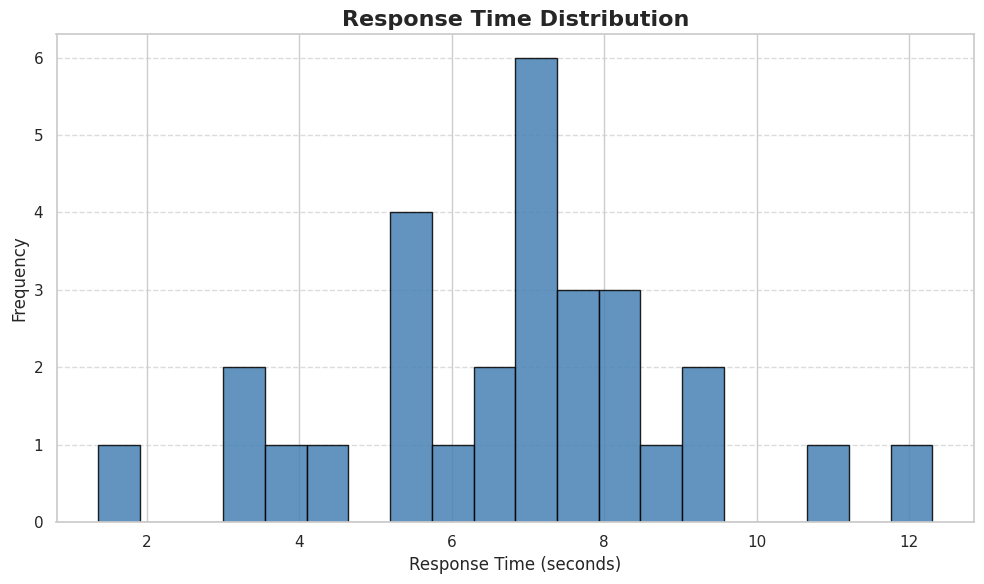

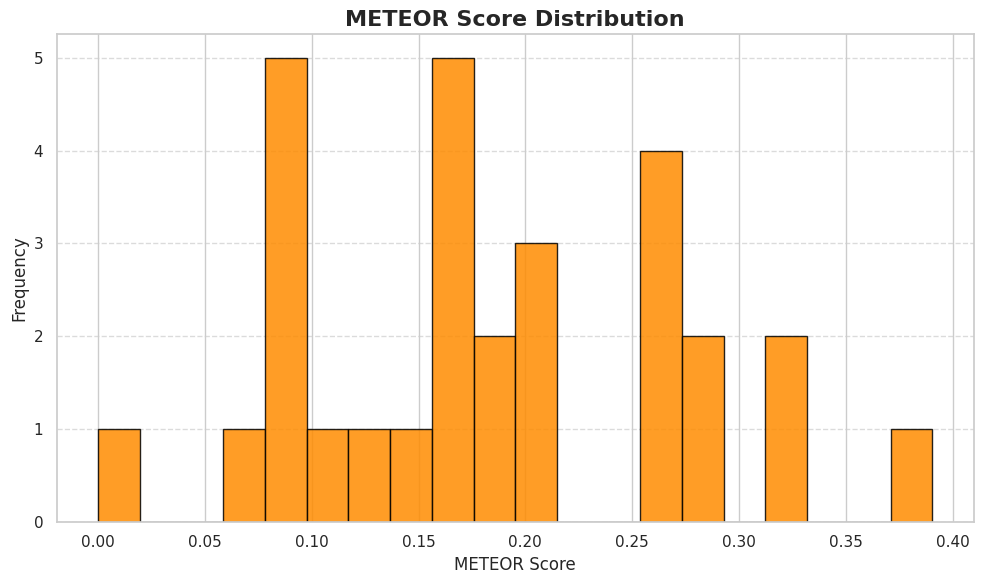

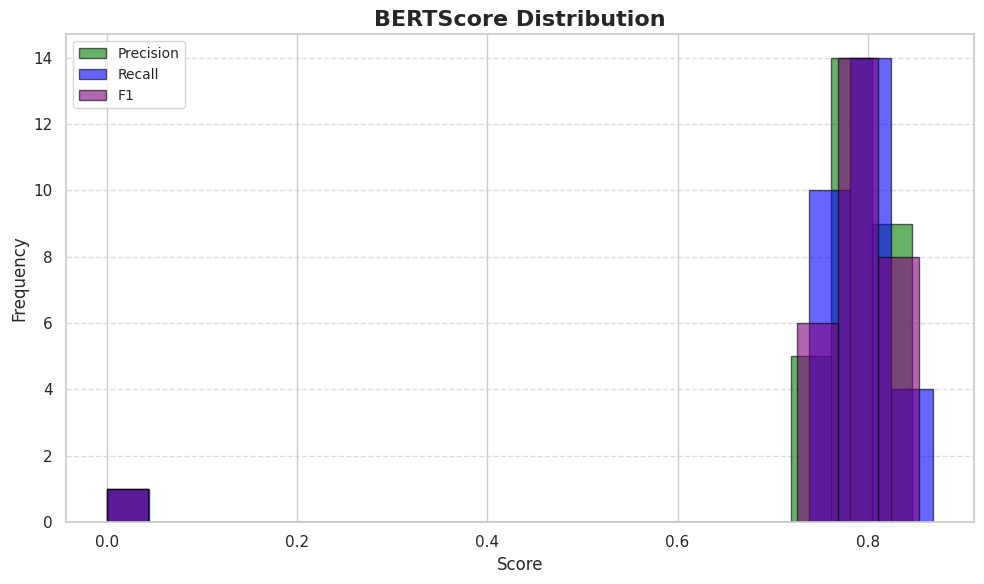

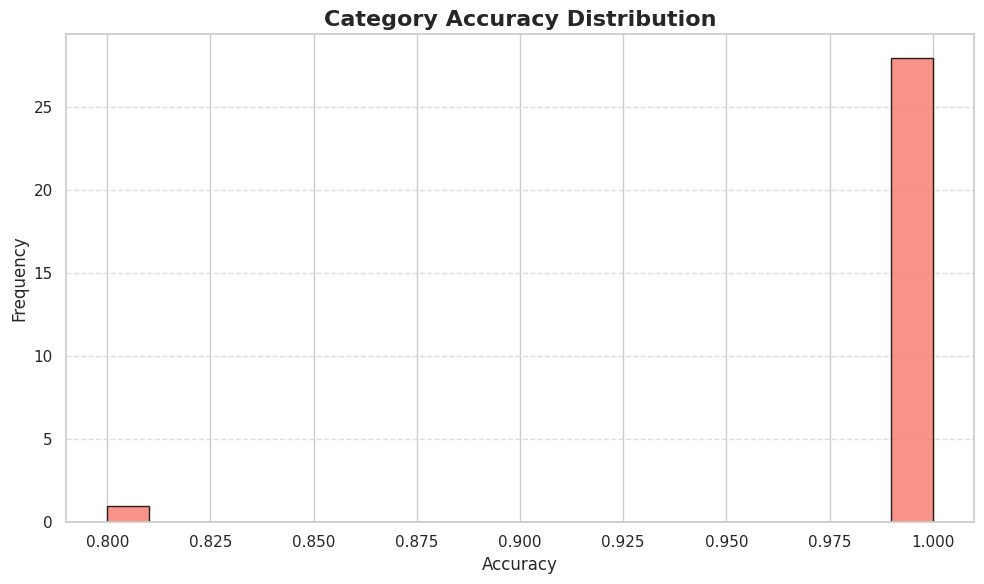

In [49]:
visualize_results(metrics, SAVE_PATH)

In [58]:
def visualize_summary(summary, save_path):
    # Summary Bar Chart (Excluding Response Time)
    labels = ['METEOR', 'BERT Precision', 'BERT Recall', 'BERT F1', 'Category Accuracy']
    values = [
        summary['meteor_score'],
        summary['bertscore']['precision'],
        summary['bertscore']['recall'],
        summary['bertscore']['f1'],
        summary['category_accuracy']
    ]
    colors = ['darkorange', 'green', 'blue', 'purple', 'salmon']

    plt.figure(figsize=(12, 7))
    bars = plt.bar(labels, values, color=colors, alpha=0.85, edgecolor='black')
    plt.title('Evaluation Metrics Summary', fontsize=18, fontweight='bold')
    plt.ylabel('Score', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, max(values) * 1.2)
    plt.bar_label(bars, fmt='%.2f', fontsize=10, padding=3)
    plt.tight_layout()
    plt.savefig(f'{save_path}/evaluation_metrics_summary.png', dpi=300)
    plt.show()

    # Response Time Visualization (Improved)
    response_time = summary['response_time']

    plt.figure(figsize=(6, 6))
    bar = plt.bar(['Response Time'], [response_time], color='skyblue', alpha=0.9, edgecolor='black', width=0.5)
    plt.title('Average Response Time', fontsize=18, fontweight='bold', pad=20)
    plt.ylabel('Time (seconds)', fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, response_time * 1.5)

    # Add value annotation above the bar
    plt.bar_label(bar, fmt='%.2f', fontsize=12, fontweight='bold', padding=8, color='darkblue')

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f'{save_path}/response_time_summary_improved.png', dpi=300)
    plt.show()

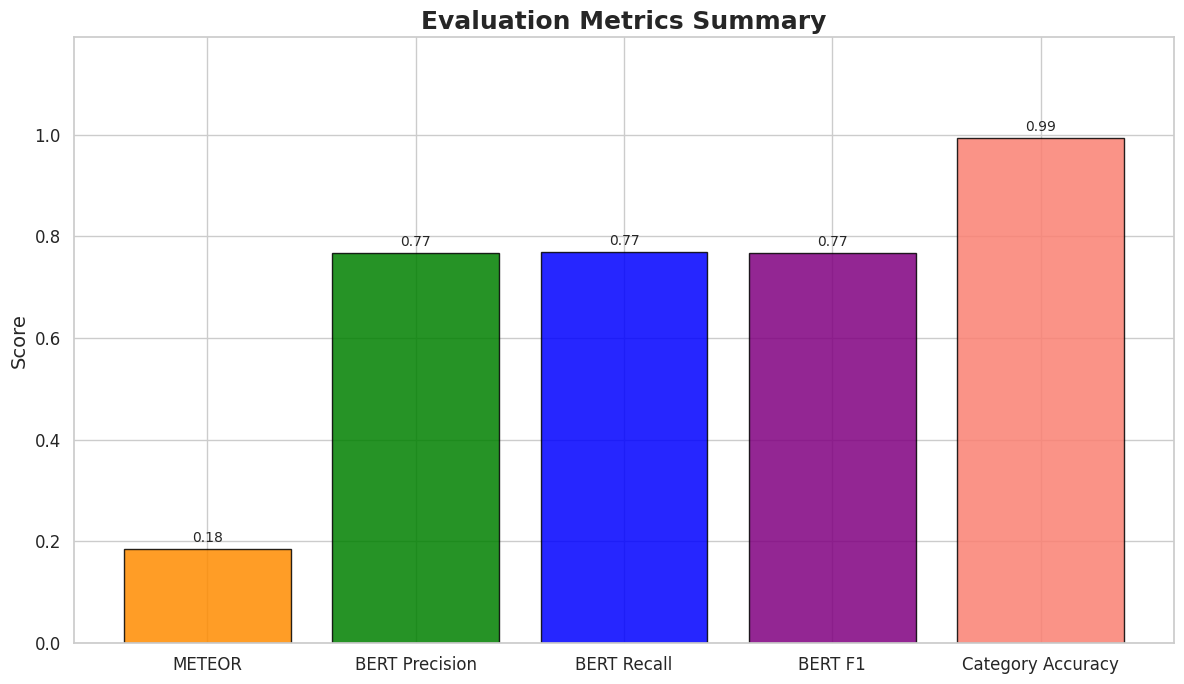

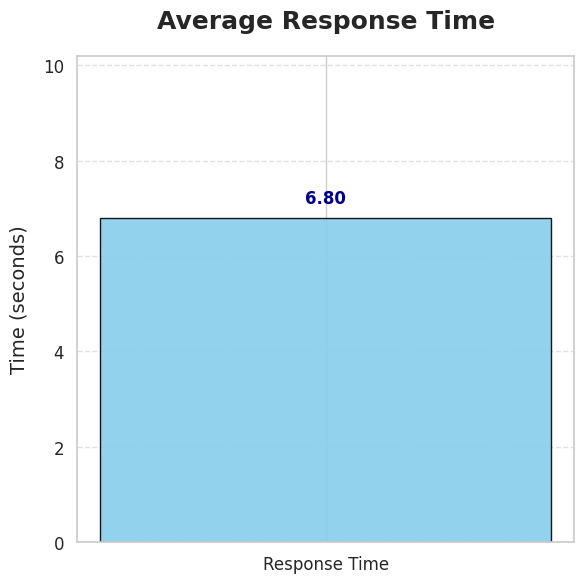

In [59]:
visualize_summary(summary, SAVE_PATH)